## 빅데이터 실습

### 1. 제주도 핫플레이스 웹 크롤링
> - `Selenium` 사용 -> 현재 인스타그램 UI가 두 종류라 코딩불가
### 2. 워드 클라우드
> - 태그 중에 빈도수가 높은 태그는 글자를 크게, 빈도수가 낮은 태그는 글자를 작게해서 구름처럼 나타내는 기술

In [1]:
# Selenium 등록
from selenium import webdriver
from bs4 import BeautifulSoup
import unicodedata
import re
import time

In [2]:
driver = webdriver.Chrome()

In [3]:
# 인스타그램 접속
driver.get('https://www.instagram.com')
time.sleep(2.0)  # 2초 정도 멈춤

In [4]:
from selenium.webdriver.common.by import By

#### 인스타그램 로그인

In [5]:
# TODO : 아이디 비번 변수에 저장(비밀번호는 추후에 변경)
email = 'a01040163427@gmail.com'
pw = 'qwer1234!@#$'

# 아이디 입력
input_id = driver.find_element(By.NAME, 'username')
input_id.clear()
input_id.send_keys(email)

# 비밀번호 입력
input_pw = driver.find_element(By.NAME, 'password')
input_pw.clear()
input_pw.send_keys(pw)

input_pw.submit()  # 로그인클릭
time.sleep(2.0)


#### 검색결과 URL 함수 생성

In [6]:
def search_instagram(word):
    url = f'https://www.instagram.com/explore/tags/{word}/'
    return url


#### 검색결과 함수를 이용하여 검색페이지 이동

In [7]:
# 24.03 현재 태그로는 30개 이사 검색안됨
driver.get(search_instagram('제주도맛집'))

#### 특정 계정의 피드로 이동하여 첫번째 게시글 클릭

In [8]:
# '제주나드리' 계정의 피드로 이동
url = 'https://www.instagram.com/jeju__nadri/'
driver.get(url)

In [9]:
# 첫번쨰 게시글 클릭하는 함수
# 클래스명이 _aagw 라는 <div>태그는 게시글 수만큼 나온다. 그중 첫번째 인덱스가 첫번째 게시물이다.
time.sleep(5.0)
first = driver.find_elements(By.CLASS_NAME, '_aagw')[0]
first.click()
time.sleep(2.0)

In [10]:
## 게시글 정보 가져오기 함수
def get_content(info):
    pass

In [11]:
# 게시글페이지 HTML 로 파싱
soup = BeautifulSoup(driver.page_source, 'html.parser')

# 본문내용에 가게명 가져오기
content = soup.select('div._a9zr>div>h1')[0].text

# 가게명
firstIndex = str(soup.select('div._a9zr>div>h1')[0]).index('>')
lastIndex = str(soup.select('div._a9zr>div>h1')[0]).index('<br/>')
shopName = str(soup.select('div._a9zr>div>h1')[0])[firstIndex + 1:lastIndex]

# 정규식 활용하여 태그
tags = re.findall(r'#[^\s#,\\]+', content)
tags

# 포스트 작성일자
date = soup.select('time.x1p4m5qa')[0]['datetime'][:10]
date

# 좋아요 수
like = soup.select('span.xdj266r.x11i5rnm.x1vvkbs')[3].text
like

# 위치정보
# (content.split('----------------------------------------')[1])
re.findall(r'(\w+[시]\s*)?', content)


['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',


#### 현재문제 
> 인스타그램 화면 UI가 두 종류이다. 통일해서 코딩 불가

### 워드 클라우드

In [12]:
# 필요 라이브러리 등록
import pandas as pd

In [13]:
raw_total = pd.read_excel('./data/1_crawling_raw.xlsx')
raw_total['tags']

0       ['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가...
1       ['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#...
2       ['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',...
3       ['#제주관광', '#제주살이', '#제주이주민', '#아라동주민', '#삼남매집'...
4       ['#제주관광', '#제주', '#돔나이트', '#스트레스', '#풀자', '#춤추...
                              ...                        
8796    ['#일상', '#구기자', '#티타임', '#2019', '#새해', '#차스타그...
8797    ['#제주', '#친정여행', '#겨울방학', '#제주여행앞머리는', '#친정찬스'...
8798                           ['#사진좀찍으시는님덕에건져또', '#이순간']
8799                                                   []
8800                            ['#HappyNewYearEveryone']
Name: tags, Length: 8801, dtype: object

In [14]:
(raw_total['tags'][0][2:-2]).split("', '")

['#제주핫플레이스',
 '#제주여행',
 '#제주여행',
 '#제주도여행',
 '#제주가볼만한곳',
 '#제주도핫플',
 '#제주여행코스',
 '#제주공항',
 '#제주도맛집',
 '#제주맛집',
 '#제주스냅',
 '#제주풍경',
 '#제주사진',
 '#제주카페',
 '#제주도카페',
 '#산굼부리',
 '#제주도바다',
 '#귤체험',
 '#우도',
 '#제주관광',
 '#제주도여향지',
 '#제주여행중',
 '#삼육오빠',
 '#제주앓이']

In [15]:
# tqdm 모듈사용
from tqdm import tqdm

In [16]:
tagAllList = []
count = 0
for tags in tqdm(raw_total['tags']):
    tagsList = tags[2:-2].split("', '")
    for tag in tagsList:
        tagAllList.append(tag)


100%|██████████| 8801/8801 [00:00<00:00, 531497.12it/s]


In [17]:
tagAllList

['#제주핫플레이스',
 '#제주여행',
 '#제주여행',
 '#제주도여행',
 '#제주가볼만한곳',
 '#제주도핫플',
 '#제주여행코스',
 '#제주공항',
 '#제주도맛집',
 '#제주맛집',
 '#제주스냅',
 '#제주풍경',
 '#제주사진',
 '#제주카페',
 '#제주도카페',
 '#산굼부리',
 '#제주도바다',
 '#귤체험',
 '#우도',
 '#제주관광',
 '#제주도여향지',
 '#제주여행중',
 '#삼육오빠',
 '#제주앓이',
 '#제주핫플',
 '#제주여행',
 '#제주',
 '#제주도',
 '#제주도맛집',
 '#제주맛집',
 '#여행',
 '#제주맛집추천',
 '#맛집추천',
 '#제주공항',
 '#제주카페',
 '#제주디저트맛집',
 '#제주데이트',
 '#제주데이트코스',
 '#제주도여행',
 '#고집돌우럭',
 '#중문맛집',
 '#제주여행중',
 '#감귤카페',
 '#제주카페추천',
 '#제주야시장',
 '#맛집',
 '#제주갈만한곳',
 '#제주관광',
 '#좋아요반사',
 '#좋반',
 '#제주도여행지',
 '#제주도가볼만한곳',
 '#제주여행코스',
 '#honestin',
 '#어니스틴',
 '#제주여행',
 '#제주',
 '#제주도',
 '#제주도여행',
 '#제주살이',
 '#제주도민',
 '#제주가볼만한곳',
 '#제주일상',
 '#제주도가볼만한곳',
 '#제주핫플레이스',
 '#제주핫플',
 '#제주라이프',
 '#가을제주',
 '#제주시',
 '#제주여행코스',
 '#제주도핫플',
 '#제주오름',
 '#들렁모루',
 '#비밀의정원',
 '#삼굼부리',
 '#정물오름',
 '#자연생태마을',
 '#오조포구',
 '#올레길',
 '#제주하늘',
 '#제주관광',
 '#11월여행',
 '#제주관광',
 '#제주살이',
 '#제주이주민',
 '#아라동주민',
 '#삼남매집',
 '#새해첫날',
 '#드라이브',
 '#명월국민학교',
 '#낙서',
 '#잡히면죽는다',
 '#제주관광',
 '#제주',
 '#돔나이트',

In [18]:
# 해쉬태그 출현 빈도
from collections import Counter

In [19]:
# Counter 클래스로 같은문자 
tagCounts = Counter(tagAllList)

In [20]:
tagCounts.most_common(50)

[('#제주맛집', 3750),
 ('#제주도맛집', 3467),
 ('#제주여행', 3204),
 ('#제주관광', 2898),
 ('#제주도', 2096),
 ('#제주', 1567),
 ('#제주도여행', 1555),
 ('#서귀포맛집', 1392),
 ('#제주도가볼만한곳', 1047),
 ('#서귀포', 872),
 ('#제주핫플레이스', 848),
 ('#jeju', 776),
 ('#제주흑돼지맛집', 730),
 ('#제주맛집추천', 728),
 ('#일상', 717),
 ('#제주도흑돼지', 713),
 ('#제주카페', 711),
 ('#제주도흑돼지맛집', 709),
 ('#제주흑돼지', 693),
 ('#협재맛집', 677),
 ('#성산일출봉', 674),
 ('#제주도민', 637),
 ('#제주도그램', 609),
 ('#서귀포흑돼지맛집', 605),
 ('', 588),
 ('#서귀포흑돼지', 582),
 ('#제주가볼만한곳', 580),
 ('#성산일출봉맛집', 567),
 ('#섭지코지', 558),
 ('#제주도민맛집', 542),
 ('#제주핫플', 530),
 ('#선팔', 522),
 ('#섭지코지맛집', 519),
 ('#제주살이', 516),
 ('#여행스타그램', 498),
 ('#통갈치구이', 495),
 ('#제주통갈치구이', 485),
 ('#제주서귀포맛집', 479),
 ('#제주반영구', 478),
 ('#중문맛집', 472),
 ('#제주눈썹문신', 472),
 ('#제주도관광', 471),
 ('#서귀포눈썹문신', 458),
 ('#여행', 455),
 ('#먹스타그램', 453),
 ('#제주시', 451),
 ('#반영구', 443),
 ('#눈썹문신', 443),
 ('#제주자연눈썹', 435),
 ('#제주속눈썹', 435)]

In [21]:
# 맛집 이외의 해시태그는 제외, 워드클라우드 결과보고 다시 필요없는 해시태그 추가, 정제한 뒤
STOPWORDS = ['#제주도', '#제주', '#jeju', '#제주시', '#일상', '#제주도민', '#반영구', '#눈썹문신',
             '#제주자연눈썹', '#제주속눈썹', '', '#서귀포', '#제주도그램', '#선팔', '#제주살이', '#여행스타그램',
             '#제주반영구', '#제주눈썹문신', '#서귀포눈썹문신', '#서귀포남자눈썹문신', '#서귀포자연눈썹',
             '#제주남자눈썹문신', '#서귀포속눈썹', '#서귀포반영구', '#제주스타그램', '#소통', '#맞팔', '#제주메이크업',
             '#daily', '#가족여행', '#jejuisland', '#제주속눈썹연장', '#제주해안도로', '#셀카', '#제주공항',
             '#서귀포문신', '#데일리', '#제주문신']

tagFilterList = []
for tag in tagAllList:
    if tag not in STOPWORDS:
        tagFilterList.append(tag)


In [22]:
tagFilterCounts = Counter(tagFilterList)
tagFilterCounts.most_common(50)

[('#제주맛집', 3750),
 ('#제주도맛집', 3467),
 ('#제주여행', 3204),
 ('#제주관광', 2898),
 ('#제주도여행', 1555),
 ('#서귀포맛집', 1392),
 ('#제주도가볼만한곳', 1047),
 ('#제주핫플레이스', 848),
 ('#제주흑돼지맛집', 730),
 ('#제주맛집추천', 728),
 ('#제주도흑돼지', 713),
 ('#제주카페', 711),
 ('#제주도흑돼지맛집', 709),
 ('#제주흑돼지', 693),
 ('#협재맛집', 677),
 ('#성산일출봉', 674),
 ('#서귀포흑돼지맛집', 605),
 ('#서귀포흑돼지', 582),
 ('#제주가볼만한곳', 580),
 ('#성산일출봉맛집', 567),
 ('#섭지코지', 558),
 ('#제주도민맛집', 542),
 ('#제주핫플', 530),
 ('#섭지코지맛집', 519),
 ('#통갈치구이', 495),
 ('#제주통갈치구이', 485),
 ('#제주서귀포맛집', 479),
 ('#중문맛집', 472),
 ('#제주도관광', 471),
 ('#여행', 455),
 ('#먹스타그램', 453),
 ('#제주일상', 424),
 ('#애월맛집', 410),
 ('#제주시맛집', 387),
 ('#카멜리아힐', 384),
 ('#중문흑돼지맛집', 377),
 ('#제주도여행코스', 361),
 ('#제주도카페', 354),
 ('#성산맛집', 342),
 ('#좋아요', 318),
 ('#서귀포맛집추천', 315),
 ('#첫줄', 311),
 ('#한림맛집', 308),
 ('#제주공항근처맛집', 307),
 ('#제주공항맛집', 275),
 ('#오설록', 247),
 ('#제주도맛집추천', 246),
 ('#제주도이색맛집', 240),
 ('#서귀포여행', 238),
 ('#서귀포카페', 233)]

#### 데이터 시각화

In [37]:
# 필요 라이브러리 등록
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 꺠짐문제 해결
from matplotlib import rc

rc('font', family='D2Coding')

plt.rcParams['axes.unicode_minus'] = False

In [24]:
# 차트 스타일 지정
sns.set_style('darkgrid')

In [25]:
dfTagCounts = pd.DataFrame(tagFilterCounts.most_common(30))

In [26]:
# 컬럼명 수정
dfTagCounts.columns = ['tag', 'count']

In [27]:
import warnings

warnings.filterwarnings('ignore')

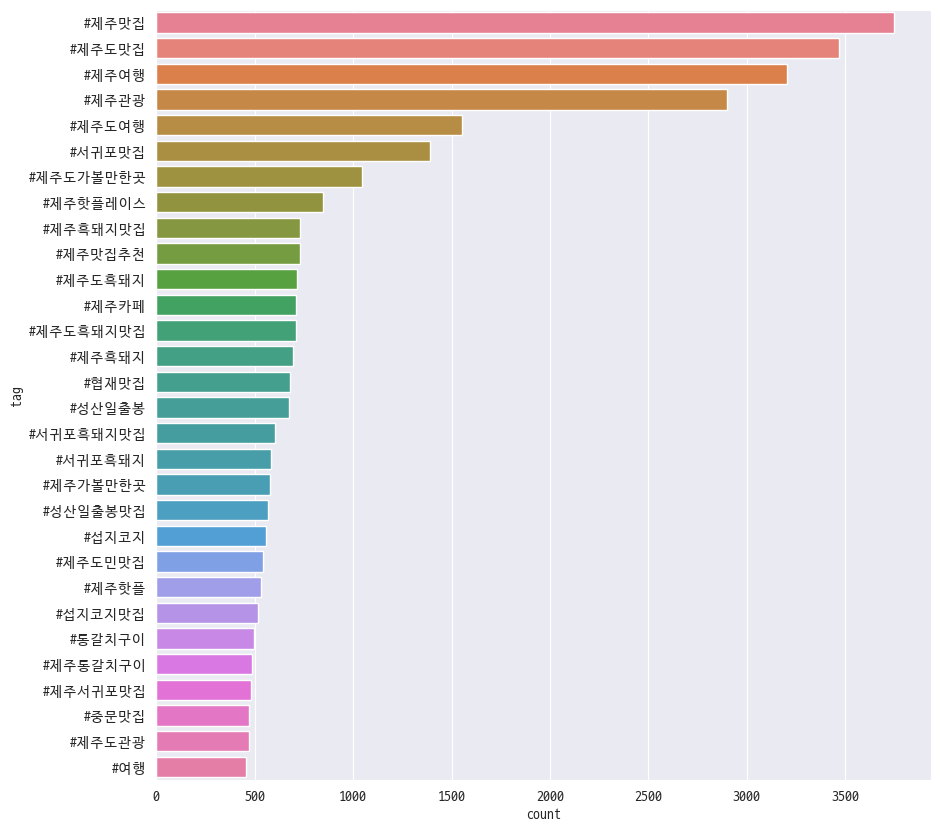

In [38]:
# DataFrame 을 막대차트로 변환
plt.figure(figsize=(10, 10))
# palette : husl , pastel, husl  등등
sns.barplot(x='count', y='tag', data=dfTagCounts, palette='husl')

plt.show()

In [29]:
# 워드 클라우드 모듈 설치
!pip3 install wordcloud

In [30]:
# 워드 클라우드 라이브러리 사용등록
from wordcloud import WordCloud

In [36]:
import platform

if platform.system() == 'Windows':
    fontPath = ''
elif platform.system() == 'Darwin':
    fontPath = '/Users/jaeyoung/Library/Fonts/D2Coding-Ver1.3.2-20180524-all.ttc'

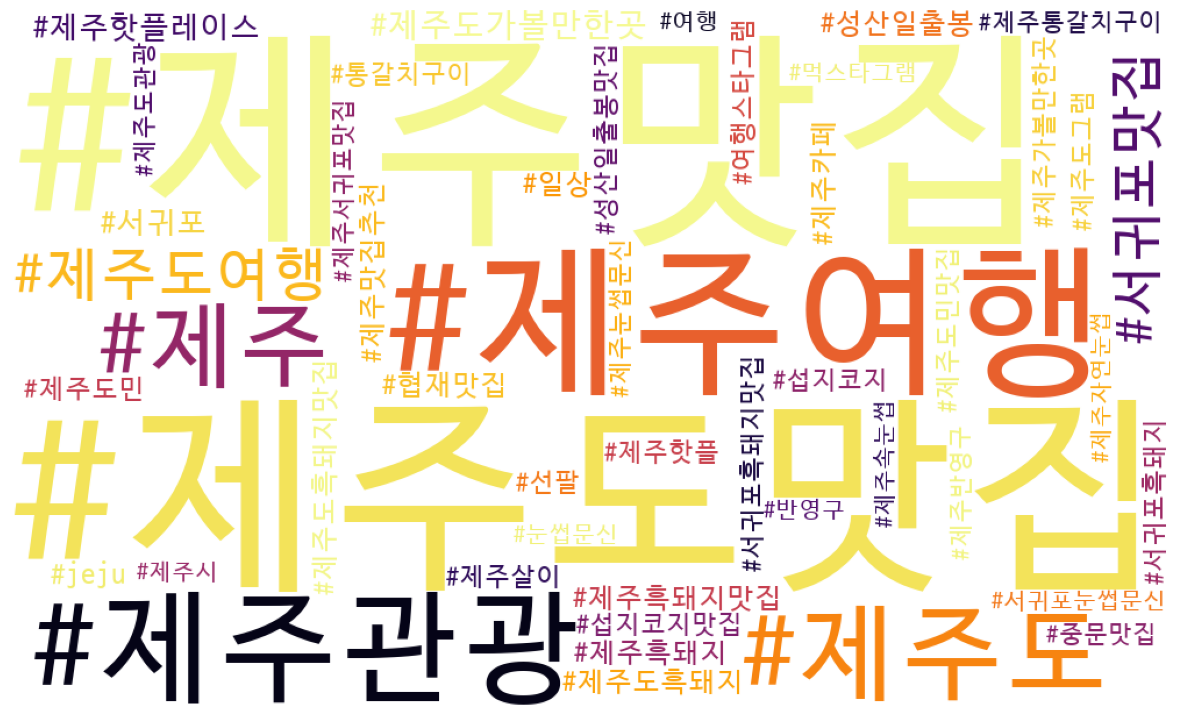

In [32]:
# 워드 클라우드 만들기

tagsLast = dict(tagCounts.most_common(50))
wc = WordCloud(font_path=fontPath, colormap='inferno', background_color='white',
               relative_scaling=0.5, width=1000, height=600,
               max_words=100).generate_from_frequencies(tagsLast)

plt.figure(figsize=(15, 10))
plt.imshow(wc)
plt.axis('off')  # x,y 좌표 숨김
plt.show()

In [33]:
# 폰트 변경

if platform.system() == 'Windows':
    fontPath = ''
elif platform.system() == 'Darwin':
    fontPath = '/Users/jaeyoung/Library/Fonts/경기천년제목OTFV_Bold.otf'

In [34]:
import numpy as np
from PIL import Image, ImageOps

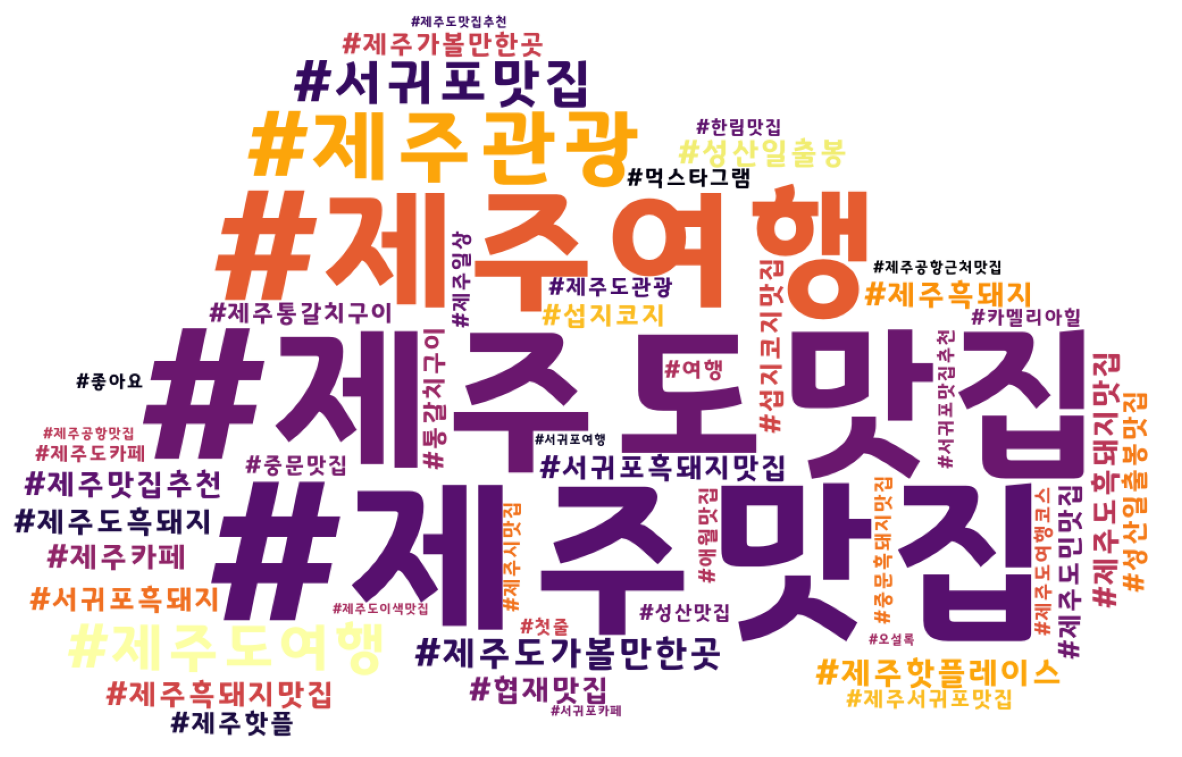

In [35]:
# 워드 클라우드 폰트변경하고 구름모양으로 생성
tagsLast = dict(tagFilterCounts.most_common(50))

mask = np.array(Image.open('./images/cloud.png'))
mask[mask.sum(axis=2) == 0] = 255

wc = WordCloud(font_path=fontPath, colormap='inferno', background_color='white',mask = mask,
               relative_scaling=0.5, width=1000, height=600,
               max_words=100).generate_from_frequencies(tagsLast)

plt.figure(figsize=(15, 10))
plt.imshow(wc)
plt.axis('off')  # x,y 좌표 숨김
plt.savefig('./images/jeju_wordcloud.png')
plt.show()